In [9]:
import numpy as np
import matplotlib.pyplot as plt

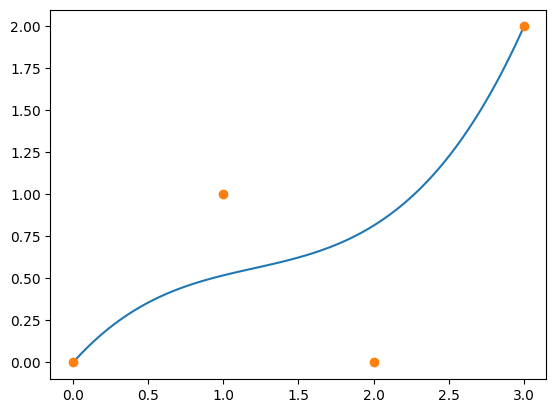

In [14]:
#create the basis coefficient matrices
#spline types: Bezier, BSpline, Catmull-Rom
#create a json file to store the basis matrices for each of the above splines

bezier3 = np.array([[-1, 3, -3, 1], [3, -6, 3, 0], [-3, 3, 0, 0],[1, 0, 0, 0]])
#random four points in space
points = np.array([[0,0], [1,1], [2,0], [3,2]])

def draw_spline(t:float):
    # print(t)
    T = np.array([t**3, t**2, t, 1])
    MP = bezier3@points
    P = T@MP
    return P

t_values = np.linspace(0, 1, 100)
spline_points = np.array([draw_spline(t) for t in t_values])
plt.plot(spline_points[:,0], spline_points[:,1])
plt.plot(points[:, 0], points[:, 1], 'o')


In [102]:
minvo3 = "-0.4302 0.4568 -0.02698 0.0004103 0.8349 -0.4568 -0.7921 0.4996 -0.8349 -0.4568 0.7921 0.4996 0.4302 0.4568 0.02698 0.0004103"
bezier3 = "1  0  0  0 -3  3  0  0  3 -6  3  0 -1  3 -3  1"
bezier3 = np.fromstring(bezier3, sep=' ', dtype=np.float32).reshape(4,4)
minvo3 = np.fromstring(minvo3, sep=' ', dtype=np.float32).reshape(4, 4)
# minvo3,np.linalg.det(minvo3)
#obtain determinant of minvo3


In [154]:
array = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])

array[[0,2]]*=-1
array

array([[-1, -2, -3],
       [ 4,  5,  6],
       [-7, -8, -9],
       [10, 11, 12]])

In [165]:
minvo3_roots = "0.03088 1.0 -1.0 0.7735 -0.7735 1.0 -1.0 -0.03088"
minvo3_roots = np.fromstring(minvo3_roots, sep=' ', dtype=np.float32).reshape(4,2)
#create mask to get the same array but without duplicating where the values are -1 or 1
# print(minvo3_roots)
mask = (minvo3_roots != -1) & (minvo3_roots != 1)
# print(minvo3_roots[mask].reshape(-1,1))
minvo3_roots = np.hstack((minvo3_roots,minvo3_roots[mask].reshape(-1,1))) #these are double roots, so we duplicate them
coefficients = np.array([np.poly(row)[::-1] for row in minvo3_roots])
coefficients[[0,2]]*=-1
minvo3 = coefficients/2.228031554725021
minvo3 = minvo3.T
# Define the roots of the polynomial
# roots = [2, 3, 5]

# # Get the coefficients of the polynomial
# coefficients = np.poly(roots)
print("Roots of the polynomial:", minvo3_roots)
print("Polynomial coefficients:", coefficients)


Roots of the polynomial: [[ 0.03088  1.       0.03088]
 [-1.       0.7735   0.7735 ]
 [-0.7735   1.      -0.7735 ]
 [-1.      -0.03088 -0.03088]]
Polynomial coefficients: [[ 9.5357443e-04 -6.2713578e-02  1.0617599e+00 -1.0000000e+00]
 [ 5.9830230e-01 -9.4869775e-01 -5.4700005e-01  1.0000000e+00]
 [ 5.9830230e-01  9.4869775e-01 -5.4700005e-01 -1.0000000e+00]
 [ 9.5357443e-04  6.2713578e-02  1.0617599e+00  1.0000000e+00]]


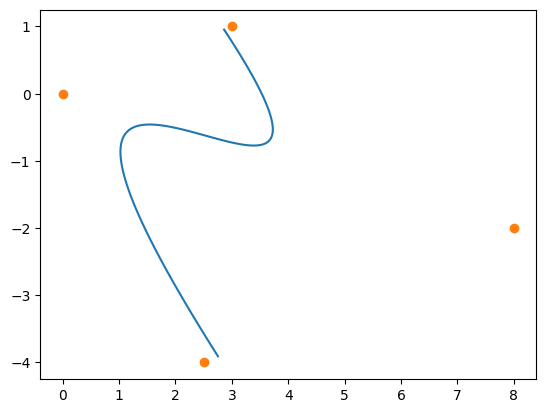

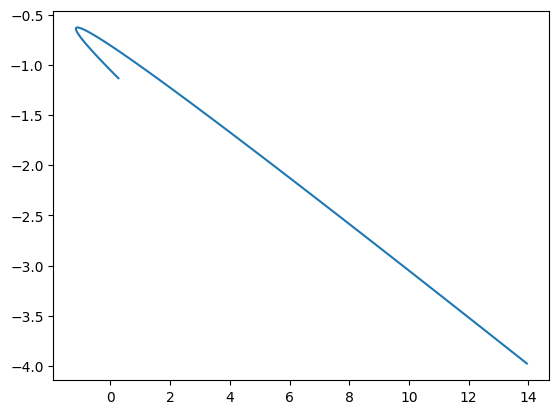

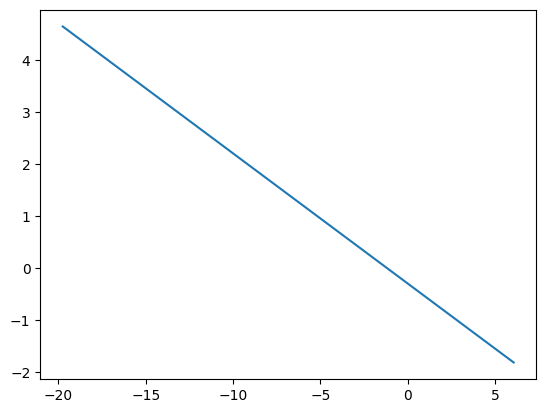

In [166]:
import numpy as np
import matplotlib.pyplot as plt

# bezier3 = np.array([[-1, 3, -3, 1], [3, -6, 3, 0], [-3, 3, 0, 0],[1, 0, 0, 0]])[::-1]
# print(bezier3.reshape(-1))
basis = minvo3
# Assume points is an array with multiple sets of four points.
# For example: points = np.array([[0,0], [1,1], [2,0], [3,2], [3,2], [4,1], [5,3], [6,0]])
# Here, [0,0], [1,1], [2,0], [3,2] form the first spline, [3,2], [4,1], [5,3], [6,0] form the second.

def t_matrix(t: float):
    '''position'''
    # T = np.array([t**3, t**2, t, 1])
    T = np.array([1, t, t**2, t**3])

    return T

def t_dash(t: float):
    '''velocity'''
    T = np.array([3*t**2, 2*t, 1, 0])
    return T

def t_ddash(t: float):
    '''acceleration'''
    T = np.array([6*t, 2, 0, 0])
    return T

def draw_spline(points, t: float):
    T = t_matrix(t)
    MP = basis @ points
    return T @ MP

def draw_velocity(points, t: float):
    T = t_dash(t)
    MP = basis @ points
    return T @ MP

def draw_acceleration(points, t: float):
    T = t_ddash(t)
    MP = basis @ points
    return T @ MP

# Assuming the points array is extended to multiple segments
def draw_connected_splines(points):
    num_segments = (len(points) - 1) // 3
    t_values = np.linspace(-1, 1, 100)
    all_spline_points = []
    all_velocity_points = []
    all_acceleration_points = []

    for i in range(num_segments):
        segment_points = points[3*i:3*i+4]  # Select the 4 control points for the current segment
        # print(segment_points)
        spline_points = np.array([draw_spline(segment_points, t) for t in t_values])
        velocity_points = np.array([draw_velocity(segment_points, t) for t in t_values])
        all_spline_points.append(spline_points)
        all_velocity_points.append(velocity_points)
        all_acceleration_points.append(np.array([draw_acceleration(segment_points, t) for t in t_values]))


    for spline_points in all_spline_points:
        plt.plot(spline_points[:, 0], spline_points[:, 1])

    plt.plot(points[:, 0], points[:, 1], 'o')  # Plot all control points
    plt.show()

    for velocity_points in all_velocity_points:
        plt.plot(velocity_points[:, 0], velocity_points[:, 1])

    plt.show()

    for acceleration_points in all_acceleration_points:
        plt.plot(acceleration_points[:, 0], acceleration_points[:, 1])
    plt.show()
# Example control points
points = np.array([[0,0], [1.2,1], [2,0], [3,2], [4,4], [5.2,3], [6,0],[6.8,-3], [8,0], [9.5,-2]])
points = np.array([[3,1],[8,-2],[0,0],[2.5,-4]])

draw_connected_splines(points)




In [146]:
0.03088**2

0.0009535744

-1.000000074505806


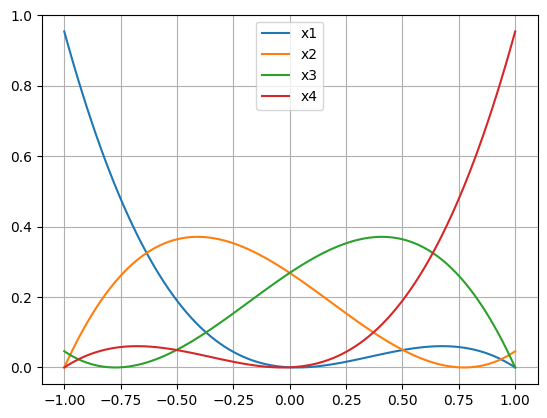

In [167]:
import matplotlib.pyplot as plt
# print(minvo3_roots)
# print(minvo3)
print((t_matrix(-1)@minvo3.T).sum())
ts = np.linspace(-1, 1, 100) #[-1, -0.9...., 1]
ys = [t_matrix(t)@minvo3 for t in ts]
plt.plot(ts, ys)
plt.grid(True)
plt.legend(['x1', 'x2', 'x3', 'x4'])